# Linear regression on Games purchases

In [20]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [21]:
# import data

games = pd.read_csv('sn_game.csv')

games.head()

,gender,age,edu,salary,sn.conn,sn.min,game.min,game.purchase
0,Female,24,University,2934,26,146.92,29.38,17
1,Female,20,University,3534,21,132.22,15.87,6
2,Male,27,University,3245,27,154.45,27.80,16
3,Male,23,University,2313,23,117.29,34.01,22
4,Male,23,High School,3685,25,104.33,22.95,18


### Exploratory analysis

In [22]:
# Explore data

games.describe()

,age,salary,sn.conn,sn.min,game.min,game.purchase
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,26.793333,2972.620000,26.233333,159.536300,30.921000,18.966667
std,5.473923,1140.850227,5.487495,42.857055,13.339674,16.112031
min,20.000000,1012.000000,18.000000,66.980000,8.090000,1.000000
25%,22.000000,1865.750000,22.000000,128.460000,20.855000,7.000000
50%,26.000000,3027.500000,25.000000,150.900000,29.670000,14.000000
75%,31.000000,3863.750000,30.000000,184.450000,38.690000,25.000000
max,39.000000,4986.000000,40.000000,296.080000,81.470000,88.000000


[Text(0, 0.5, 'games'), Text(0.5, 0, 'gender')]

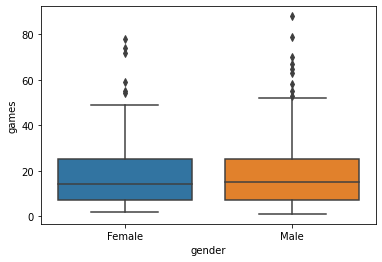

In [23]:
# started with the categorical columns 'gender' and 'education'

# Checked the gender column to see if that affects game purchase
# no difference between genders

c = sns.boxplot(x='gender', y='game.purchase', data=games)
c.set(xlabel='gender', ylabel='games')

In [24]:
# Same can be shown by numbers only. 
# mean games for females are 18.551948
# fore males 19.404110

games.groupby('gender').mean()

,age,salary,sn.conn,sn.min,game.min,game.purchase
gender,,,,,,
Female,26.987013,2944.545455,26.435065,159.108896,30.783636,18.551948
Male,26.589041,3002.232877,26.020548,159.987123,31.065890,19.404110


[Text(0, 0.5, 'games'), Text(0.5, 0, 'education')]

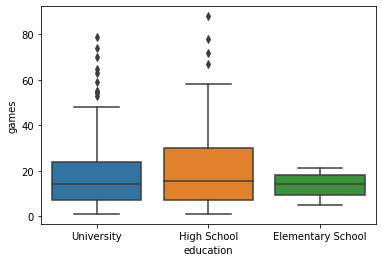

In [25]:
# Check the education level and game purchase

c = sns.boxplot(x='edu', y='game.purchase', data=games)
c.set(xlabel='education', ylabel='games')

                    age    salary   sn.conn    sn.min  game.min  game.purchase
age            1.000000 -0.035874  0.959591  0.731363  0.510522       0.306323
salary        -0.035874  1.000000 -0.039378 -0.022477  0.007469       0.506232
sn.conn        0.959591 -0.039378  1.000000  0.764332  0.537065       0.313600
sn.min         0.731363 -0.022477  0.764332  1.000000  0.708585       0.413934
game.min       0.510522  0.007469  0.537065  0.708585  1.000000       0.783938
game.purchase  0.306323  0.506232  0.313600  0.413934  0.783938       1.000000


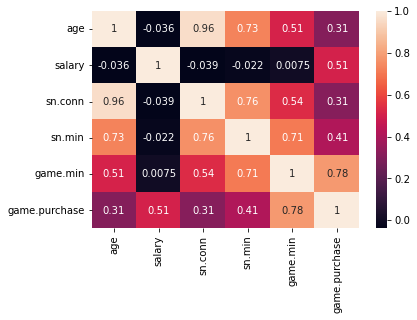

In [26]:
# Check numericals for correlation
# game.min (minutes spent playing games) shows highest correlation (0.783938), salary moderate (0.506232)
# sn.min may be slightly interesting as well (0.413934)

corr_ex = games.corr()
print(corr_ex)

# Visualize with heatmap

sns.heatmap(corr_ex, annot=True)

Text(0, 0.5, 'games')

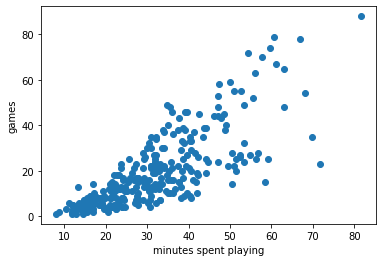

In [27]:
# Visualise game.min with scatterplot

x = games['game.min']
y = games['game.purchase']

plt.scatter(x,y)

plt.xlabel('minutes spent playing')
plt.ylabel('games')

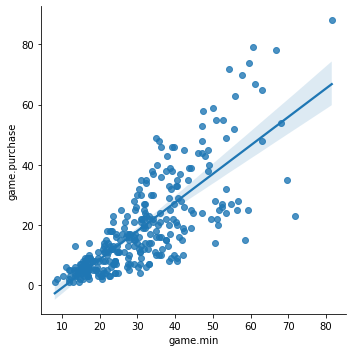

In [28]:
sns.lmplot('game.min', 'game.purchase', data = games)

Text(0, 0.5, 'games')

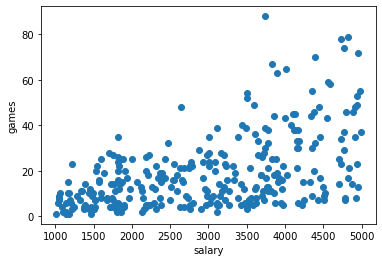

In [29]:
# Visualise salary in a scatterplot

x = games['salary']
y = games['game.purchase']

plt.scatter(x,y)

plt.xlabel('salary')
plt.ylabel('games')

Text(0, 0.5, 'games')

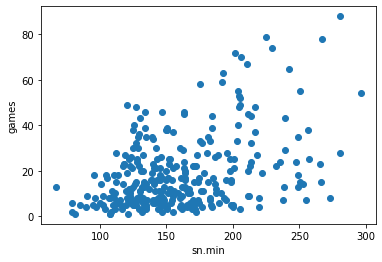

In [30]:
# visualised 'sn.min'. Not as strong a relationship as I want. I will draw the line at 0.5 correlation
# this variable also shows high correlation with 'game.min' (0.708585), might pose a problem with the model if both included

x = games['sn.min']
y = games['game.purchase']

plt.scatter(x,y)

plt.xlabel('sn.min')
plt.ylabel('games')

In [31]:
# Based on the exploratory analysis I will choose to focus on 'game.min' and 'salary' in my regression model since it shows the 
# strongest correlation and linearity

# Multiple Linear regression fits this purpose

### Linear regression model

In [32]:
# Separate predictors 'game.min'+ 'salary' and target 'game.purchase'

purchase_X, purchase_y = games[['game.min', 'salary']], games['game.purchase']

In [33]:
# Create multiple linear regression object

g_model = linear_model.LinearRegression()

# Train the model using the training sets and fit it
g_model.fit(purchase_X, purchase_y)

# Check the coefficient and intercept (the parameters of the linear regression model)

# the intercept is -31.179599953736716
# coefficients are [0.94234832 0.00706714]

# every change in predictor variables will change the value of target variable 
# by the value of the relevant cofficients of each predictor

print(g_model.intercept_)
print(g_model.coef_)

-31.179599953736716
[0.94234832 0.00706714]


In [34]:
# check predictions using the model

purchase_y_pred = g_model.predict(purchase_X)

purchase_y_pred[:5]

array([17.24157506,  8.75073174, 17.95054447, 17.2159554 , 16.48969561])

In [35]:
# changed the array to series 
# the predicted purchases 

pd.Series(purchase_y_pred).head()

0    17.241575
1     8.750732
2    17.950544
3    17.215955
4    16.489696
dtype: float64

In [36]:
# checking mean squared error and r-squared

# The mean squared error 

# 34.94164129774154

print(mean_squared_error(purchase_y, purchase_y_pred))

# r2 score

# 0.8649505616361515 is good (1 is perfect)

print(r2_score(purchase_y, purchase_y_pred))

34.94164129774154
0.8649505616361515


In [37]:
# statistical summary of the regression model to get more information about the model 
# The statistics that have been previously mentioned are also shown in the model

X2 = sm.add_constant(purchase_X)
est = sm.OLS(purchase_y, X2)
est2 = est.fit()

print(est2.summary())


# We can see R-squared again - 0.865 = ca 86 % of games purchases can be explained by minutes spent playing games 
# and salary of the customer

# R-squared in the model is closer to 1 than 0, which is good

# Prob (F-statistic)/p-value associated with the overall F-statistic:  7.55e-130, very close to 0.000
# model is statistically significant

# P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant.
# We can see that 'game.min' and 'salary' is statistically significant (p = 0.00) 

# the intercept is also shown here again as -31.1796 
# coefficient for each predictor variable is also visible 0.9423, 0.0071

                            OLS Regression Results                            
Dep. Variable:          game.purchase   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     951.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          7.55e-130
Time:                        13:47:57   Log-Likelihood:                -958.73
No. Observations:                 300   AIC:                             1923.
Df Residuals:                     297   BIC:                             1935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.1796      1.242    -25.103      0.0